<a href="https://colab.research.google.com/github/slagana8/Heart_Disease_Indicators/blob/main/Indicators_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Key Indicators of Heart Disease
### Which variables have a significant effect on the increased chance of heart disease?
Sam Lagana 


In [302]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [303]:
# Load data 
df = pd.read_csv("/content/drive/MyDrive/Project 2/heart_2020 .csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


- No uncecessary columns to delete

## Data Cleaning

In [304]:
# Check for duplicates and missing data 
print("Missing data:\n",df.isna().sum())
print("\n")
print("Duplicates:", df.duplicated().sum())

Missing data:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Duplicates: 27


In [305]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [306]:
# Confirm drop 
df.duplicated().sum()

0

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9418 entries, 0 to 9444
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      9418 non-null   object 
 1   BMI               9418 non-null   float64
 2   Smoking           9418 non-null   object 
 3   AlcoholDrinking   9418 non-null   object 
 4   Stroke            9418 non-null   object 
 5   PhysicalHealth    9418 non-null   int64  
 6   MentalHealth      9418 non-null   int64  
 7   DiffWalking       9418 non-null   object 
 8   Sex               9418 non-null   object 
 9   AgeCategory       9418 non-null   object 
 10  Race              9418 non-null   object 
 11  Diabetic          9418 non-null   object 
 12  PhysicalActivity  9418 non-null   object 
 13  GenHealth         9418 non-null   object 
 14  SleepTime         9418 non-null   int64  
 15  Asthma            9418 non-null   object 
 16  KidneyDisease     9418 non-null   object 


Check for inconsistencies in categorical values

In [308]:
# Heart Disease column 
df["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [309]:
# Smoking column 
df["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [310]:
# Diff Walking column 
df["DiffWalking"].unique()

array(['No', 'Yes'], dtype=object)

In [311]:
# Sex Column 
df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [312]:
# Age Category Column 
df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [313]:
# Race Column 
df["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [314]:
# Diabetic Column 
df["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [315]:
# Replace with more manageable values
df["Diabetic"] = df["Diabetic"].replace(to_replace = ("No, borderline diabetes"), value = "Borderline")
df["Diabetic"] = df["Diabetic"].replace(to_replace = "Yes (during pregnancy)", value = "During Pregnancy")

In [316]:
# Confirm Replacement
df["Diabetic"].unique()

array(['Yes', 'No', 'Borderline', 'During Pregnancy'], dtype=object)

In [317]:
# Physical Activity Column 
df["PhysicalActivity"].unique()

array(['Yes', 'No'], dtype=object)

In [318]:
# GenHealth Column 
df["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [319]:
# Asthma column 
df["Asthma"].unique()

array(['Yes', 'No'], dtype=object)

In [320]:
# Kidney Disease Column 
df["KidneyDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [321]:
# Skin Cancer
df["SkinCancer"].unique()

array(['Yes', 'No'], dtype=object)

## Univariate Visuals for Categorical Features

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9418 entries, 0 to 9444
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      9418 non-null   object 
 1   BMI               9418 non-null   float64
 2   Smoking           9418 non-null   object 
 3   AlcoholDrinking   9418 non-null   object 
 4   Stroke            9418 non-null   object 
 5   PhysicalHealth    9418 non-null   int64  
 6   MentalHealth      9418 non-null   int64  
 7   DiffWalking       9418 non-null   object 
 8   Sex               9418 non-null   object 
 9   AgeCategory       9418 non-null   object 
 10  Race              9418 non-null   object 
 11  Diabetic          9418 non-null   object 
 12  PhysicalActivity  9418 non-null   object 
 13  GenHealth         9418 non-null   object 
 14  SleepTime         9418 non-null   int64  
 15  Asthma            9418 non-null   object 
 16  KidneyDisease     9418 non-null   object 


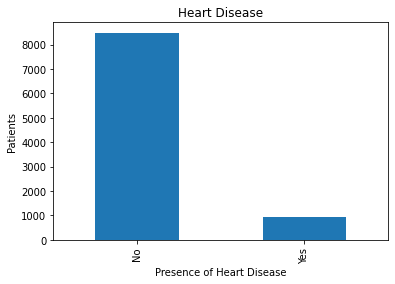

In [323]:
# Heart Disease (target)
df["HeartDisease"].value_counts().plot(kind = "bar");
plt.title("Heart Disease")
plt.xlabel("Presence of Heart Disease")
plt.ylabel("Patients")
plt.savefig("Heart_Disease")

This visualization shows that in our target (Heart Disease) there are significantly less people who have the disease then who don't

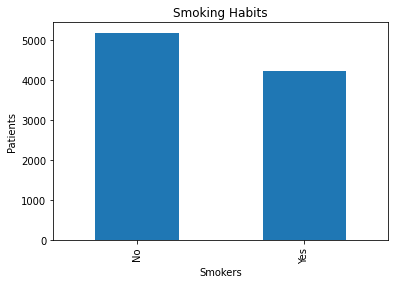

In [324]:
# Smoking (feature)
df["Smoking"].value_counts().plot(kind = "bar")
plt.title("Smoking Habits")
plt.xlabel("Smokers")
plt.ylabel("Patients");


Consistent Data is shown. 

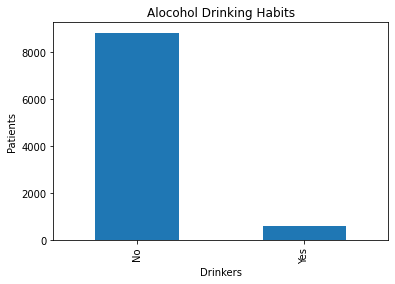

In [325]:
# Alcohol Drinking (feature)
df["AlcoholDrinking"].value_counts().plot(kind = "bar")
plt.title("Alocohol Drinking Habits")
plt.xlabel("Drinkers")
plt.ylabel("Patients");

Data is skewed towards the answer of not being a heavy drinker

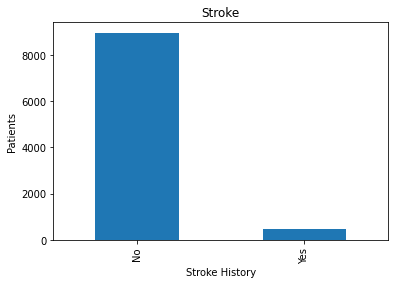

In [326]:
# Stroke (feature)
df["Stroke"].value_counts().plot(kind = "bar")
plt.title("Stroke")
plt.xlabel("Stroke History")
plt.ylabel("Patients");

Data shows significantly less people have had a stroke.

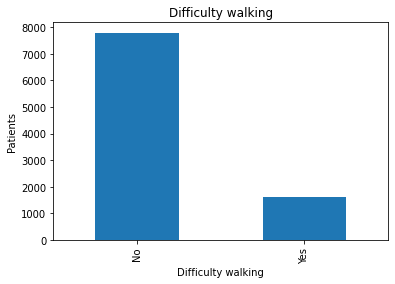

In [327]:
# Diff Walking (feature)
df["DiffWalking"].value_counts().plot(kind = "bar")
plt.title("Difficulty walking")
plt.xlabel("Difficulty walking")
plt.ylabel("Patients");

Data shows that significantly less people have trouble walking then do. 

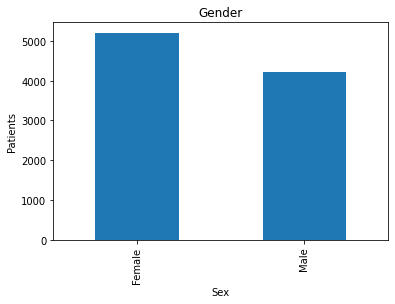

In [328]:
# Sex (feature)
df["Sex"].value_counts().plot(kind = "bar")
plt.title("Gender")
plt.xlabel("Sex")
plt.xticks(rotation = 90)
plt.ylabel("Patients");


Data seems to be consistent 

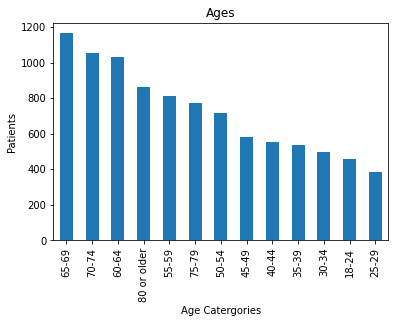

In [329]:
# Age category (feature)
df["AgeCategory"].value_counts().plot(kind = "bar")
plt.title("Ages")
plt.xlabel("Age Catergories")
plt.ylabel("Patients");

Data seems to be consistent 

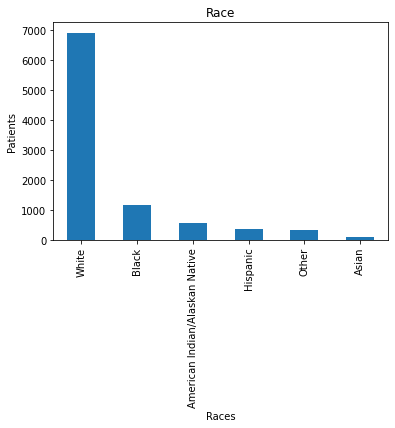

In [330]:
# Race (feature)
df["Race"].value_counts().plot(kind = "bar")
plt.title("Race")
plt.xlabel("Races")
plt.ylabel("Patients");

Data is shows significantly more White people were sampled.

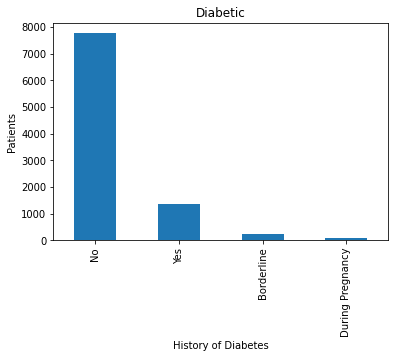

In [331]:
# Diabetes (feature)
df["Diabetic"].value_counts().plot(kind = "bar")
plt.title("Diabetic")
plt.xlabel("History of Diabetes")
plt.ylabel("Patients");

Data shows significantly more people answered no.

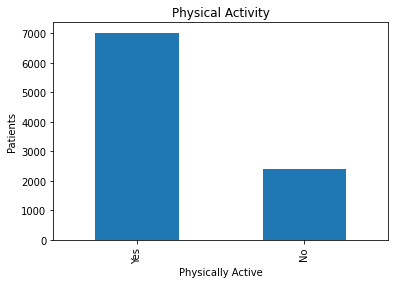

In [332]:
# Physical Activity (feature)
df["PhysicalActivity"].value_counts().plot(kind = "bar")
plt.title("Physical Activity")
plt.xlabel("Physically Active")
plt.ylabel("Patients");

Data showed significantly more people answered yes.

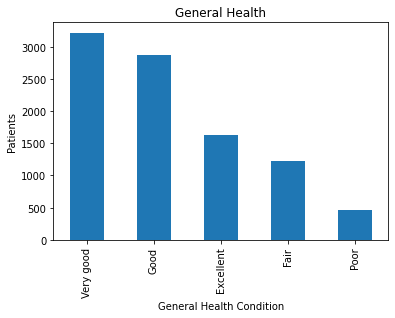

In [333]:
# GenHealth (feature)
df["GenHealth"].value_counts().plot(kind = "bar")
plt.title("General Health")
plt.xlabel("General Health Condition")
plt.ylabel("Patients");

Data seems to be consistent

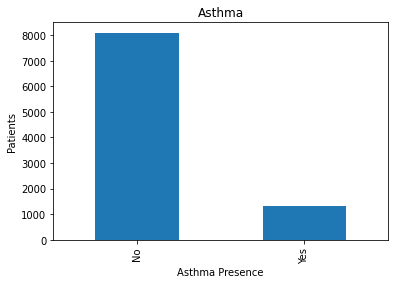

In [334]:
# Asthma (feature)
df["Asthma"].value_counts().plot(kind = "bar")
plt.title("Asthma")
plt.xlabel("Asthma Presence")
plt.ylabel("Patients");

Data shows more people answered No.

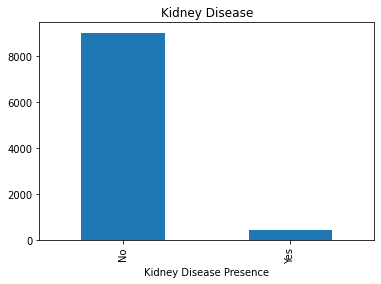

In [335]:
# KidneyDisease (feature)
df["KidneyDisease"].value_counts().plot(kind = "bar")
plt.title("Kidney Disease")
plt.xlabel("Kidney Disease Presence");

Data shows more people don't have kidney disease in this set

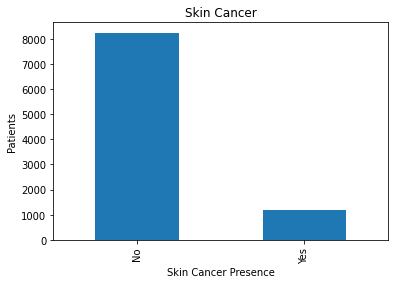

In [336]:
# Skin Cancer (feature)
df["SkinCancer"].value_counts().plot(kind = "bar")
plt.title("Skin Cancer")
plt.xlabel("Skin Cancer Presence")
plt.ylabel("Patients");

More people don't have Skin Cancer in this data set

For all the categorical columns all data seems to be pretty consistent. Even though in most of them one feature is more common then the other since our target is if they have Heart Disease or not I believe it represents what would be true since more people don't have Heart Disease in this data set. 

## Univariate Visuals for Numerical Features

In [337]:
df["BMI"].describe()

count    9418.000000
mean       28.623224
std         6.445283
min        12.480000
25%        24.210000
50%        27.460000
75%        31.890000
max        82.760000
Name: BMI, dtype: float64

In [338]:
# Locate outlier in BMI
df.loc[df["BMI"]== 82.760000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
9088,No,82.76,No,No,No,1,0,No,Female,50-54,Hispanic,Yes,Yes,Good,10,No,No,No


In [339]:
# Drop data point
df.drop(index = 9088, inplace = True)

In [340]:
# Confirm deletion 
df.loc[df["BMI"]== 82.760000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [341]:
# Explore other outlier
df.loc[df["BMI"]== 75.820000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
561,No,75.82,No,No,No,0,0,No,Female,50-54,White,No,Yes,Good,8,Yes,Yes,No


In [342]:
# Drop data point
df.drop(index = 561, inplace = True)

In [343]:
# Confirm Deletion 
df.loc[df["BMI"]== 75.820000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [344]:
df.loc[df["BMI"]==75.77,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
9358,Yes,75.77,Yes,Yes,Yes,0,30,Yes,Male,30-34,Black,Yes,No,Fair,15,Yes,No,No


In [345]:
# Explore min outlier
df.loc[df["BMI"]==12.48000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1688,Yes,12.48,Yes,No,Yes,12,2,No,Male,50-54,Black,No,No,Fair,12,No,Yes,No


While exploring the BMI feature I noticed three outlier data points I wanted to explore further. While it is possible to have a high BMI of > 75 I determined it would be highly unlikely for this to happen and have no heart disease. When looking at the min for the feature I discovered it was 12.48. After exploring further I decided not to drop the outlier because the rest of the data features for this row seem to be consistent. I checked investegated further outliers after removing the first two and came to the conclusion they were possible. 

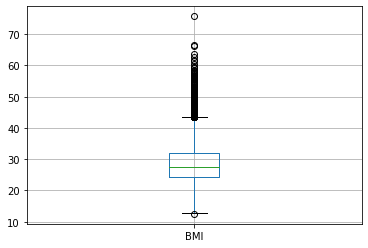

In [346]:
# BMI Boxplot 
df.boxplot(column = "BMI");

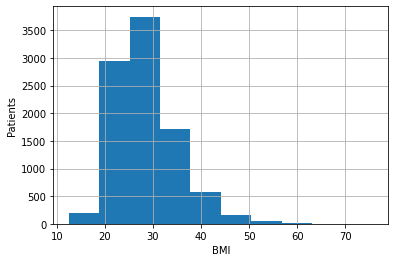

In [347]:
# BMI Histogram
df["BMI"].hist()
plt.xlabel("BMI")
plt.ylabel("Patients");

Data has some outliers but most of the data points fall between the 20 and 35 range. 

In [348]:
df["PhysicalHealth"].describe()

count    9416.000000
mean        3.854822
std         8.358284
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        30.000000
Name: PhysicalHealth, dtype: float64

Since this represents amount of days excersised in the last 30 days I believe all this data is consistent.

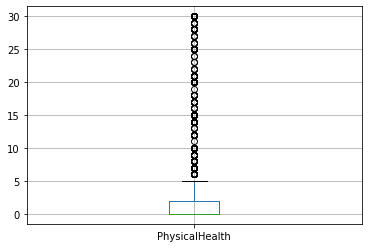

In [349]:
# Physical Health Boxplot
df.boxplot(column = "PhysicalHealth");

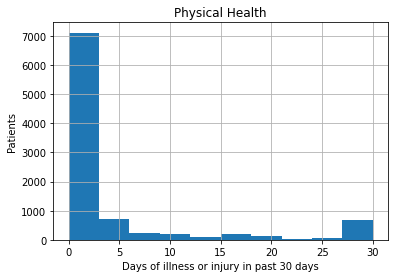

In [350]:
# Physical Health Histogram
df["PhysicalHealth"].hist()
plt.title("Physical Health")
plt.xlabel("Days of illness or injury in past 30 days")
plt.ylabel("Patients");


These visuals show there are a lot of outliers with the majority of the data points lying between 0 and 5. I believe this is accurate because this represents how many days their physical health wasn't up to par out of 30 days. 

In [351]:
df["MentalHealth"].describe()

count    9416.000000
mean        3.798428
std         7.938648
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        30.000000
Name: MentalHealth, dtype: float64

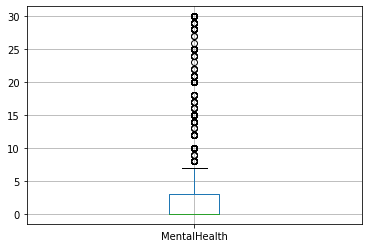

In [352]:
# Mental Health Box Plot
df.boxplot(column = "MentalHealth");

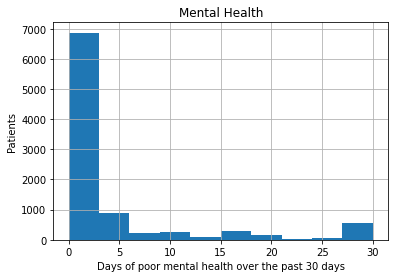

In [353]:
# Mental Health Histogram
df["MentalHealth"].hist();
plt.title("Mental Health")
plt.xlabel("Days of poor mental health over the past 30 days")
plt.ylabel("Patients");

These visuals show there are a lot of outliers with the majority of the data points lying between 0 and 5. I believe this is accurate because this represents how many days their mental health wasn't up to par out of 30 days. 

In [354]:
df["SleepTime"].describe()

count    9416.000000
mean        7.125956
std         1.520496
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        20.000000
Name: SleepTime, dtype: float64

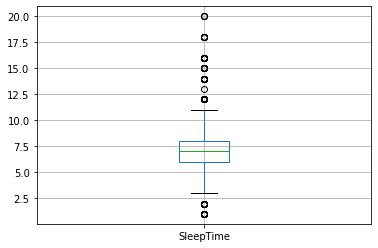

In [355]:
# Sleep time Box Plot
df.boxplot(column = "SleepTime");

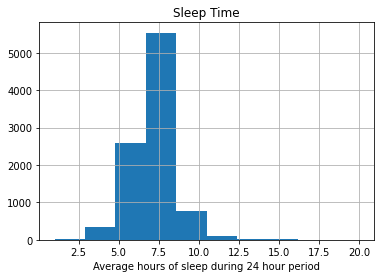

In [356]:
# Sleep Time Histogram
df["SleepTime"].hist()
plt.title("Sleep Time")
plt.xlabel("Average hours of sleep during 24 hour period")
plt.savefig("Sleeptime");

These visuals show that most of the data points fall between 5 and 10. Values represent hours of sleep in a 24 hour period. There are some outliers but while they might be uncommon I do believe they are still possible. 

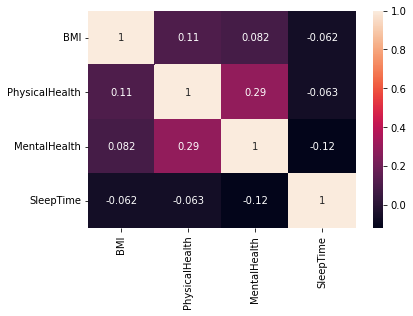

In [357]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, annot = True);
plt.savefig("Heatmap")

None of the features seem to have a moderate or strong correlation between each other. 

## Pre-processing 

In [358]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [359]:
# See target distribution
df["HeartDisease"].value_counts()

No     8486
Yes     930
Name: HeartDisease, dtype: int64

Target class is very unbalanced so I will use over and undersample the data in a later step

In [360]:
# Create function for classification report, confusion matrix and ROC AUC
def evaluate_classification(model, X_test, y_test, cmap = "Blues",
                            normalize = "true", classes = None, figsize = (20,5)):
    test_preds = model.predict(X_test)
    print(metrics.classification_report(y_test, test_preds, target_names = classes))

    fig, ax = plt.subplots(ncols = 3, figsize = figsize)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = cmap,
                                          display_labels = classes,
                                          ax = ax[0])
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = cmap,
                                          display_labels = classes, normalize = "true",
                                          ax = ax[1])
    curve = metrics.plot_roc_curve(model, X_test, y_test, ax = ax[2])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1],ls = ":")


In [361]:
# Create features matrixs and target vector
X = df.drop(columns = "HeartDisease")
y = df["HeartDisease"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y)

# Create categorical feature
cat_columns = make_column_selector(dtype_include = "object")
#Create numerical feature
num_columns = make_column_selector(dtype_include = "number")

# Instantiate encoder
encoder = OneHotEncoder(handle_unknown = "ignore")
# Instantiate scaler
scaler = StandardScaler()

# Make tuples
cat_tuple = (encoder, cat_columns)
num_tuple = (scaler, num_columns)

# Make column transformer to match transformations with appropriate columns
transformer = make_column_transformer(cat_tuple, num_tuple)

## Logistic Regression

In [362]:
# Base model

# Instantiate model 
log_reg = LogisticRegression(solver = "liblinear")

# Create pipeline
log_reg_pipe = make_pipeline(transformer, log_reg)

# Fit on training data
log_reg_pipe.fit(X_train, y_train)

print("Training accuracy of base model:", log_reg_pipe.score(X_train, y_train))
print("Testing accuracy of base model:", log_reg_pipe.score(X_test, y_test))

Training accuracy of base model: 0.9030019824412348
Testing accuracy of base model: 0.8997451146983857


              precision    recall  f1-score   support

          No       0.91      0.98      0.95      2122
         Yes       0.47      0.12      0.20       232

    accuracy                           0.90      2354
   macro avg       0.69      0.55      0.57      2354
weighted avg       0.87      0.90      0.87      2354



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


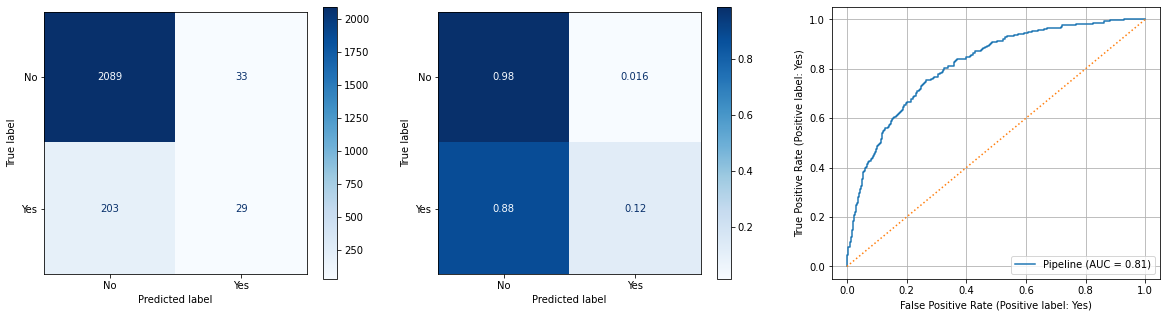

In [363]:
# Evaluate function 
evaluate_classification(log_reg_pipe, X_test, y_test)
plt.savefig("Logistic_Reg")

The logistic regression base model without any tuning has a good accuracy on the training and testing set but doesn't have good precision or recall when ran on testing data set when it comes to predicting the positive class. 

The AUC is 83% but I still don't think this is a strong model because it's strength is predicting the negative class and since this data set is unbalanced the majority of the values are in the negative class and that's why the AUC score is good. 

## Grid Search to improve Logistic Regression model

In [364]:
# Get Params
log_reg_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f93282e7210>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f93281aac10>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'column

In [365]:
# Define params
params = {"logisticregression__penalty":["l1","l2"],
          "logisticregression__C":[0.0001, 0.001, 0.01],
          "logisticregression__class_weight":[None,"balanced"]}
logreg_grid = GridSearchCV(log_reg_pipe, params)
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f93282e7210>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f93281aac10>)])),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01],
               

In [366]:
# Get out the best parameters
logreg_grid.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': None,
 'logisticregression__penalty': 'l2'}

In [367]:
# Get out the best model
best_logreg = logreg_grid.best_estimator_

In [368]:
print("Training accuracy of GridSearch model:", best_logreg.score(X_train, y_train))
print("Testing accuracy of GridSearch model:", best_logreg.score(X_test, y_test))

Training accuracy of GridSearch model: 0.9034267912772586
Testing accuracy of GridSearch model: 0.9018691588785047


              precision    recall  f1-score   support

          No       0.91      0.99      0.95      2122
         Yes       0.52      0.06      0.10       232

    accuracy                           0.90      2354
   macro avg       0.71      0.53      0.52      2354
weighted avg       0.87      0.90      0.86      2354



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


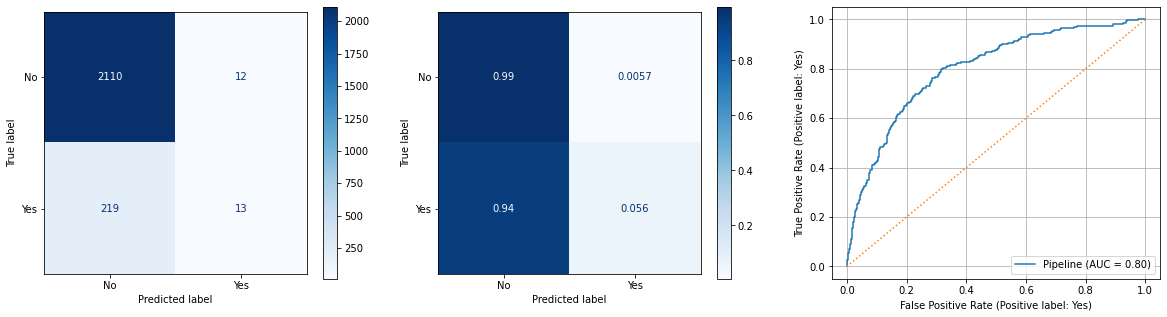

In [369]:
# Evaluate best GridSearch model 
evaluate_classification(best_logreg, X_test, y_test)
plt.savefig("GridSearch")

The precision, recall, and AUC all are lower than the logistic regression base model and the accuracy is about the same so I don't think this model improved our ability to predict

## Random Oversampling of positive class to improve model 

In [370]:
# Class count
count_class_no, count_class_yes = df["HeartDisease"].value_counts()

# divide the class
df_class_yes = df[df["HeartDisease"]=="Yes"]
df_class_no = df[df["HeartDisease"]=="No"]

In [371]:
# Oversample postive class
df_class_yes_over = df_class_yes.sample(count_class_no, replace = True)
# Combine oversampled df with negative class into new df
df_test_over = pd.concat([df_class_no, df_class_yes_over], axis = 0)

In [372]:
print("Random Over-Sampling")
print(df_test_over["HeartDisease"].value_counts())

Random Over-Sampling
No     8486
Yes    8486
Name: HeartDisease, dtype: int64


In [373]:
# Pre processing 
# Create features matrixs and target vector
X = df_test_over.drop(columns = "HeartDisease")
y = df_test_over["HeartDisease"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y)

# Create categorical feature
cat_columns = make_column_selector(dtype_include = "object")
#Create numerical feature
num_columns = make_column_selector(dtype_include = "number")

# Instantiate encoder
encoder = OneHotEncoder(handle_unknown = "ignore")
# Instantiate scaler
scaler = StandardScaler()

# Make tuples
cat_tuple = (encoder, cat_columns)
num_tuple = (scaler, num_columns)

# Make column transformer to match transformations with appropriate columns
transformer = make_column_transformer(cat_tuple, num_tuple)


In [374]:
#Logistic regression model ran on oversampled data 
over_pipe = make_pipeline(transformer, log_reg)
over_pipe.fit(X_train, y_train)
print("Training accuracy of oversampled model:", over_pipe.score(X_train, y_train))
print("Testing accuracy of oversampled model:", over_pipe.score(X_test, y_test))

Training accuracy of oversampled model: 0.760153979102836
Testing accuracy of oversampled model: 0.7692670280461937


              precision    recall  f1-score   support

          No       0.79      0.74      0.76      2121
         Yes       0.76      0.80      0.78      2122

    accuracy                           0.77      4243
   macro avg       0.77      0.77      0.77      4243
weighted avg       0.77      0.77      0.77      4243



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


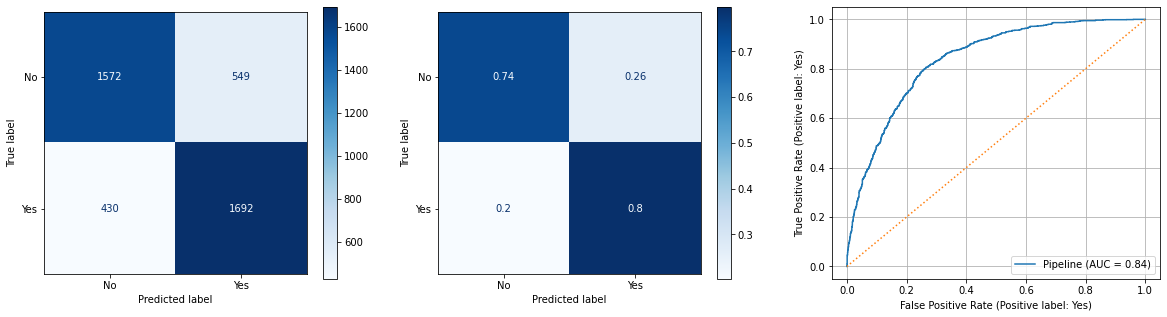

In [375]:
# Evaluate function 
evaluate_classification(over_pipe, X_test, y_test)
plt.savefig("Oversampling")

While the accuracy score went down and it got worse at predicting the negative class this model greately improved the ability to predict the positive class from it being able to predict just 9% of the postive class to 79%

## Random Undersampling to improve model performance

In [376]:
# Class Count
count_class_no, count_class_yes = df["HeartDisease"].value_counts()

# divide the class
df_class_yes = df[df["HeartDisease"]=="Yes"]
df_class_no = df[df["HeartDisease"]== "No"]

In [377]:
# Undersample the negative class
df_class_no_under = df_class_no.sample(count_class_yes)
# Combine new undersampled data with positive class
df_test_under = pd.concat([df_class_no_under, df_class_yes], axis = 0)

# Confirm
print("Random Under-Sampling")
print(df_test_under["HeartDisease"].value_counts())

Random Under-Sampling
No     930
Yes    930
Name: HeartDisease, dtype: int64


In [378]:
# Pre-processing 
# Create features matrixs and target vector
X = df_test_under.drop(columns = "HeartDisease")
y = df_test_under["HeartDisease"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y)

# Create categorical feature
cat_columns = make_column_selector(dtype_include = "object")
#Create numerical feature
num_columns = make_column_selector(dtype_include = "number")

# Instantiate encoder
encoder = OneHotEncoder(handle_unknown = "ignore")
# Instantiate scaler
scaler = StandardScaler()

# Make tuples
cat_tuple = (encoder, cat_columns)
num_tuple = (scaler, num_columns)

# Make column transformer to match transformations with appropriate columns
transformer = make_column_transformer(cat_tuple, num_tuple)


In [379]:
# Logistic Regression with undersampled dataset
under_pipe = make_pipeline(transformer, log_reg)
under_pipe.fit(X_train, y_train)
print("Training accuracy of under-sampled model:", over_pipe.score(X_train, y_train))
print("Testing accuracy of under-sampled model:", over_pipe.score(X_test, y_test))

Training accuracy of under-sampled model: 0.7577060931899642
Testing accuracy of under-sampled model: 0.7634408602150538


              precision    recall  f1-score   support

          No       0.75      0.78      0.77       232
         Yes       0.77      0.75      0.76       233

    accuracy                           0.76       465
   macro avg       0.76      0.76      0.76       465
weighted avg       0.76      0.76      0.76       465



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


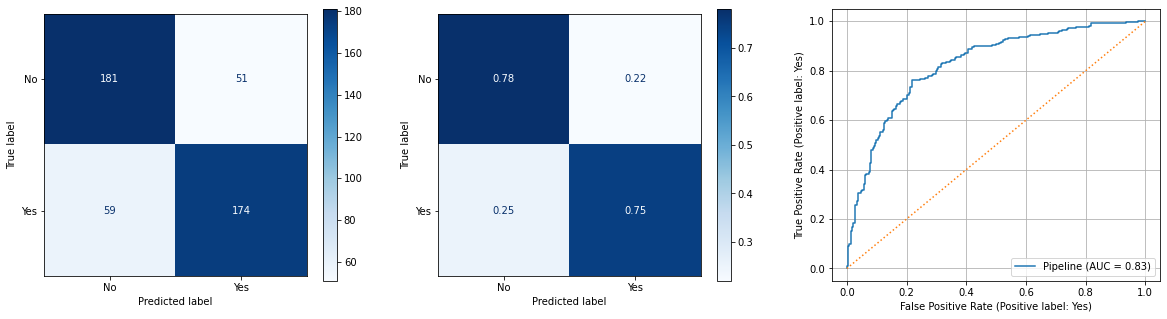

In [380]:
# Evaluation function 
evaluate_classification(under_pipe, X_test, y_test)

## KNN Model

In [381]:
# Function to calculate and plot silhouette score and inertia 
def plot_k_values(data, ks):
  """plot the silhouette score and inertia 
  of a KMeans model for various k values"""

  sils = []
  inertias = []

  for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sils.append(silhouette_score(data, km.labels_))
    inertias.append(km.inertia_)
      
  # plot inertia and silhouette score
  fig, ax1 = plt.subplots(figsize=(9,7))
  ax1.set_xlabel('number of clusters')
  ax1.set_ylabel('Inertia', color = 'blue')
  ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  
  ax2 = ax1.twinx() 
  
  ax2.set_ylabel('Silhouette Score', color = 'red')
  ax2.plot(ks, sils, color = 'red',label='silhouette score',marker='+')
  ax1.legend(loc=0)  
  ax2.legend(loc='upper left')
  plt.grid()
  plt.show()

In [382]:
# Transform data 
new_df = transformer.fit_transform(df)

In [383]:
# Convert to dataframe
new_dataframe = pd.DataFrame(new_df)
new_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,-1.876074,-0.102278,3.300683,-1.398273
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-1.291971,-0.461222,-0.478498,-0.082843
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,-0.317424,1.931740,3.300683,0.574872
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.687565,-0.461222,-0.478498,-0.740558
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.765653,2.888925,-0.478498,0.574872


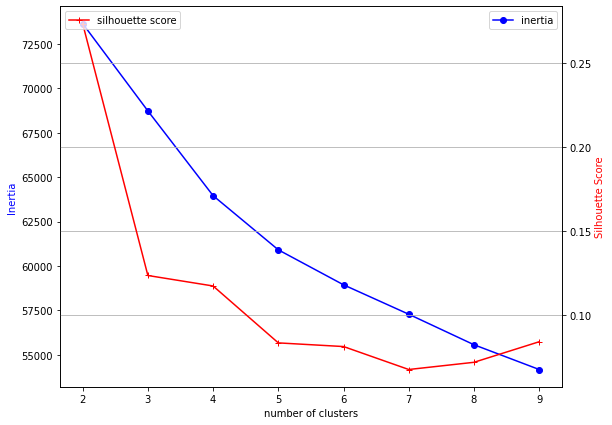

In [384]:
# Plot silhoette score and inertia to determine best number of clusers
ks = range(2,10)
plot_k_values(new_dataframe, ks)

In [385]:
# Instantiate KMeans
km = KMeans(n_clusters=2, random_state = 42)


# add cluster columns
df["Cluster"] = km.fit_predict(new_dataframe)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Cluster
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,1
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,0
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,1
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,0


In [386]:
cluster_logreg = LogisticRegression(solver = "liblinear")
cluster_pipe = make_pipeline(transformer, cluster_logreg)

cluster_pipe.fit(X_train, y_train)

print("Training accuracy of cluster model:", cluster_pipe.score(X_train, y_train))
print("Testing accuracy of cluster model:", cluster_pipe.score(X_test, y_test))

Training accuracy of cluster model: 0.7577060931899642
Testing accuracy of cluster model: 0.7634408602150538


              precision    recall  f1-score   support

          No       0.75      0.78      0.77       232
         Yes       0.77      0.75      0.76       233

    accuracy                           0.76       465
   macro avg       0.76      0.76      0.76       465
weighted avg       0.76      0.76      0.76       465



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


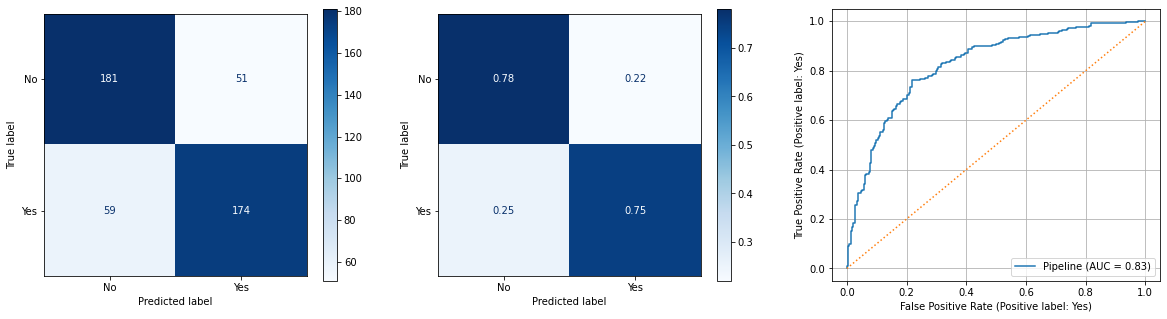

In [387]:
evaluate_classification(cluster_pipe, X_test, y_test)

Overall, the KNN did not make any impovements from original model.

## Final Decision

After running and tuning multiple models I believe the best model for production is the model done by oversampling the positive class. 

Even though the accuracy score goes down and its ability to predict the negative class weakens it gets a significant amount better at predicting the positive class from predicting 9% of true positives to predicting 79% of true positives. 

I believe this is the best model because in this case we are trying to predict if the patients have heart disease and better predicting true positives will lead to patients getting the treatment they need